In [2]:
import time

In [3]:

from diffractio import degrees, mm, np, num_max_processors, plt, um
from diffractio.scalar_fields_X import (Scalar_field_X,
                                        extended_polychromatic_source,
                                        extended_source_multiprocessing,
                                        polychromatic_multiprocessing)
from diffractio.scalar_masks_X import Scalar_mask_X
from diffractio.scalar_sources_X import Scalar_source_X
from diffractio.utils_multiprocessing import (_pickle_method, _unpickle_method,
                                              execute_multiprocessing)
from diffractio.utils_optics import (gauss_spectrum, lorentz_spectrum,
                                     uniform_spectrum)

In [4]:
def __experiment_extended_source__(x0):

    x = np.linspace(-500 * um, 500 * um, 1024)
    wavelength = 0.850 * um
    z0 = -500 * mm
    period = 50 * um
    focal = 5 * mm

    red = Scalar_mask_X(x, wavelength)
    red.ronchi_grating(x0=0 * um, period=period, fill_factor=0.5)

    lens = Scalar_mask_X(x, wavelength)
    lens.lens(focal=focal, radius=30 * mm)

    u1 = Scalar_source_X(x, wavelength)

    # posiciones de la fuente

    u1.spherical_wave(
        A=1., x0=x0, z0=z0, radius=100000 * um, mask=False, normalize=True)
    u2 = u1 * red * lens
    u2.RS(z=focal, new_field=False, verbose=False)

    return u2

In [5]:
def __function_polychromatic__(wavelength):
    x0 = np.linspace(-75 * um, 75 * um, 1024 * 8)

    t1 = Scalar_mask_X(x0, wavelength)
    t1.slit(x0=0, size=100 * um)

    f1 = Scalar_source_X(x0, wavelength)
    f1.gauss_beam(x0=0 * um, w0=200 * um, z0=0 * um, A=1, theta=0. * degrees)

    u1 = f1 * t1
    u1.RS(z=10 * um, new_field=False, verbose=False)

    return u1

In [6]:
def __experiment_grating_movement__(dict_params):
    delta_x = dict_params['delta_x']
    period = dict_params['period']
    t1 = dict_params['t1']
    t2 = dict_params['t2']
    t2.ronchi_grating(period, x0=delta_x, fill_factor=0.5)
    u2 = t1 * t2
    return u2

In [5]:
# def test_draw_varias_distances(self):
#     func_name = sys._getframe().f_code.co_name
#     filename = '{}{}'.format(newpath, func_name)
#
#     num_cores = num_max_processors  # el paralelizado no funciona
#     x = np.linspace(-250 * um, 250 * um, 1024 * 8)
#     wavelength = 0.6328 * um
#
#     t1 = Scalar_mask_X(x, wavelength)
#     t1.slit(x0=0, size=250 * um)
#     t1.draw()
#
#     distances = [1 * mm, 2 * mm, 3 * mm, 5 * mm]
#
#     dict_RS = dict(
#         z=distances,
#         n=1,
#         new_field=True,
#         fast=False,
#         kind='z',
#         xout=None,
#         verbose=True)
#
#     if num_cores == 1:
#         for z in distances:
#             u1 = t1.RS(z=z, new_field=True)
#             u1.draw()
#     else:
#
#         pool = Pool(num_cores)
#         data_pool = pool.map(t1.RS, dict_RS)
#         pool.close()
#         pool.join()
#
#         plt.figure()
#         for result in data_pool:
#             plt.plot(result.x, np.abs(result.u)**2)
#
#     save_figure_test(newpath, func_name)
#
#     assert True

def test_extended_source_simple(self):
    """
    tomamos una red de difraccion y analizamos el efecto Lau con fuente extensa
    La fuente extensa la definimos como suma de fuentes puntuales esfericas
    Esquema: Fuente extensa, red, lens, vista en plano focal
    """

num_proc: 1, time=0.35114169120788574


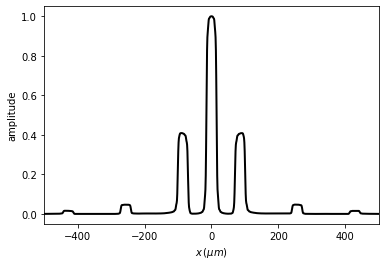

In [8]:

# definiciones
x = np.linspace(-500 * um, 500 * um, 1024)
wavelength = 0.850 * um
num_fuentes = 101
S = 3000 * um
z0 = -500 * mm
period = 50 * um
focal = 5 * mm

red = Scalar_mask_X(x, wavelength)
red.ronchi_grating(x0=0 * um, period=period, fill_factor=0.5)

lens = Scalar_mask_X(x, wavelength)
lens.lens(focal=focal, radius=30 * mm)

u1 = Scalar_source_X(x, wavelength)

# posiciones de la fuente
x0s = np.linspace(-S / 2, S / 2, num_fuentes)
intensities = Scalar_field_X(x, wavelength)

time1 = time.time()
for x0 in x0s:
    u1.spherical_wave(
        A=1,
        x0=x0,
        z0=z0,
        radius=100000 * um,
        mask=False,
        normalize=True)
    u2 = u1 * lens * red
    u2.RS(z=focal, new_field=False, verbose=False)
    intensities.u = intensities.u + abs(u2.u)**2

intensities.u = intensities.u / intensities.u.max()
time_proc = time.time() - time1
print("num_proc: {}, time={}".format(1, time_proc))
intensities.draw(kind='amplitude')

In [ ]:
def test_polychromatic(self):
 

In [16]:
wavelengths = np.linspace(.3 * um, .9 * um, 1001)
w_central = wavelengths.mean()
spectrum_gauss = gauss_spectrum(
    wavelengths=wavelengths,
    w_central=w_central,
    Dw=0.4,
    normalize=True)

intensity, u_s, time_proc = polychromatic_multiprocessing(
    __function_polychromatic__,
    wavelengths,
    spectrum_gauss,
    num_processors=num_max_processors,
    verbose=True)

num_proc: 8, time=5.593793630599976
1001


In [ ]:
time1=time.time()
intensity0, u_s0, time_proc0 = polychromatic_multiprocessing(
    __function_polychromatic__,
    w_central,
    1,
    num_processors=1,
    verbose=True)
time_proc1 = time.time() - time1
print("num_proc: 1, time={}".format(time_proc1))

num_proc: 1, time=0.03945589065551758


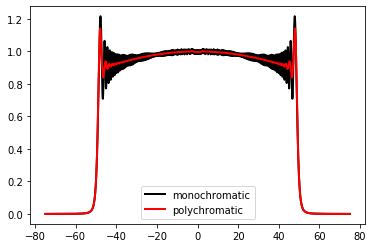

In [17]:
plt.figure()
plt.plot(u_s0.x, intensity0, 'k', lw=2, label='monochromatic')
plt.plot(u_s[0].x, intensity, 'r', lw=2, label='polychromatic')
plt.legend()

In [ ]:
def test_extended_source_multiprocessing(self):
    """Tomamos una red de difraccion y analizamos el efecto Lau con fuente extensa
        La fuente extensa la definimos como suma de fuentes puntuales esfericas
        Esquema: Fuente extensa, red, lens, vista en plano focal
    """

num_proc: 8, time=0.2519400119781494
num_proc: 1, time=0.00687718391418457


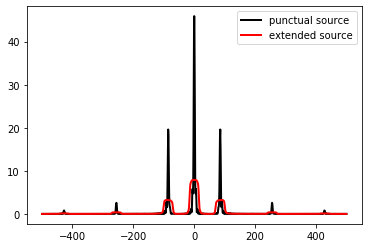

In [18]:
    x0s = np.linspace(-1500 * um, 1500 * um, 101)
    x0_central = 0 * um

    intensity, u_s, time_proc = extended_source_multiprocessing(
        __experiment_extended_source__,
        x0s,
        num_processors=num_max_processors,
        verbose=True)
    intensity0, u_s0, time_proc0 = extended_source_multiprocessing(
        __experiment_extended_source__,
        x0_central,
        num_processors=1,
        verbose=True)

    plt.figure()
    plt.plot(u_s0.x, intensity0, 'k', lw=2, label='punctual source')
    plt.plot(u_s[0].x, intensity, 'r', lw=2, label='extended source')
    plt.legend()

def test_grating_movement(self):

In [7]:

def creation_dictionary(deltas_x, period, t1, t2):
    # create Parameters: for multiprocessing
    dict_Parameters = []
    for i, delta_x in enumerate(deltas_x):
        dict_Parameters.append(
            dict(delta_x=delta_x, period=period, t1=t1, t2=t2))
    return dict_Parameters

x0 = np.linspace(-400 * um, 400 * um, 1024 * 8)
wavelength = 0.85 * um
period = 50 * um
z_talbot = 2 * period**2 / wavelength
z0 = z_talbot / 2
delay = 0.001

t1 = Scalar_mask_X(
    x0, wavelength, info="__experiment_grating_movement__")
t1.ronchi_grating(period, x0=0 * um, fill_factor=0.5)
t1.RS(z=z0, new_field=False)

t2 = Scalar_mask_X(
    x0, wavelength, info="__experiment_grating_movement__")
t2.ronchi_grating(period, x0=0 * um, fill_factor=0.5)

deltas_x = np.linspace(-60 * um, 60 * um, 512)  # 512
num_processors = num_max_processors

dict_Parameters = creation_dictionary(
    deltas_x=deltas_x, period=period, t1=t1, t2=t2)

u_s, time_proc = execute_multiprocessing(
    __experiment_grating_movement__,
    dict_Parameters,
    num_processors,
    verbose=True)

x = u_s[0].x

perfil = np.zeros_like(deltas_x)

Using matplotlib backend: nbAgg
('Good result: factor ', 64.08906877651066)
num_proc: 8, time=0.2888185977935791


In [26]:
%matplotlib notebook

<IPython.core.display.Javascript object>


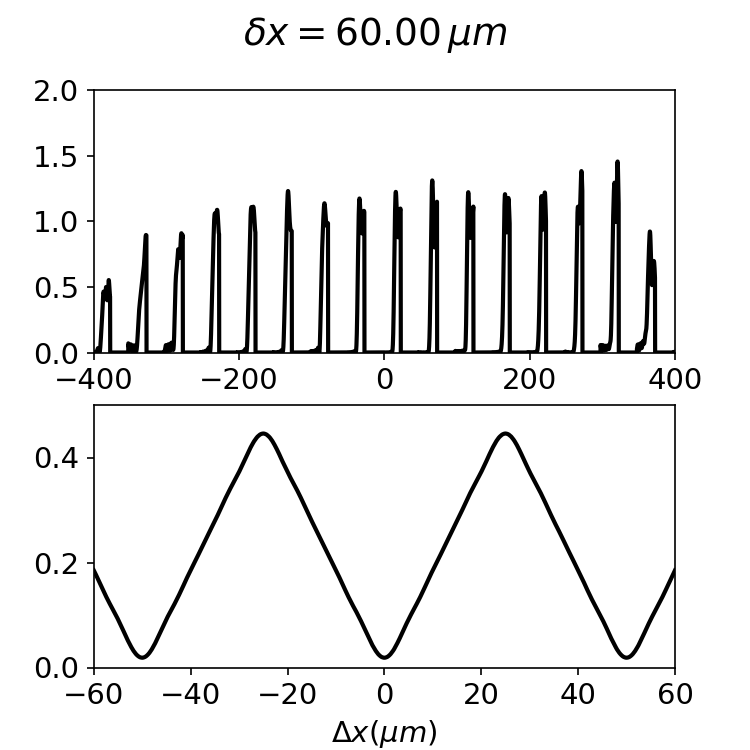

In [28]:
fig = plt.figure()
ax1 = fig.add_subplot(211)
h1, = ax1.plot(x, np.zeros_like(x), 'k', lw=2)
ax1.set_xlim(x[0], x[-1])
ax1.set_ylim(0, 2)
ax1.set_xlabel(r'$x (\mu m)$')

ax2 = fig.add_subplot(212)
h2, = ax2.plot(deltas_x, perfil, 'k', lw=2)
ax2.set_xlim(deltas_x[0], deltas_x[-1])
ax2.set_ylim(0, .5)
ax2.set_xlabel(r'$\Delta x (\mu m)$')

incr_frames = 1
for i in range(0, len(deltas_x), incr_frames):
    intensidad = abs(u_s[i].u)**2  # sacar fuera
    perfil[i] = intensidad.mean()
    plt.suptitle(
        r"$\delta x={:6.2f}\,\mu m$".format(deltas_x[i]), fontsize=18)
    h1.set_ydata(intensidad)
    h2.set_ydata(perfil)
    plt.draw()


In [29]:
def __experiment_double_slit_dictionary__(dict_params):
    x0 = dict_params['x0']
    wavelength = dict_params['wavelength']
    z = dict_params['z']
    slit_size = dict_params['slit_size']
    separation = dict_params['separation']
    t1 = Scalar_mask_X(x0, wavelength)
    t1.slit(x0=0, size=20 * um)
    t1.double_slit(x0=0, size=slit_size, separation=separation)

    f1 = Scalar_source_X(x0, wavelength)
    f1.gauss_beam(x0=0 * um, w0=200 * um, z0=0 * um, A=1, theta=0. * degrees)

    u1 = f1 * t1
    u1.RS(z, new_field=False, verbose=False)

    return u1

In [30]:
def __experiment_double_slit_array__(slit_size):
    x0 = np.linspace(-75 * um, 75 * um, 1024 * 8)
    wavelength = 0.6328 * um
    separation = 50 * um
    z = 100 * um

    t1 = Scalar_mask_X(x0, wavelength)
    t1.slit(x0=0, size=20 * um)
    t1.double_slit(x0=0, size=slit_size, separation=separation)

    f1 = Scalar_source_X(x0, wavelength)
    f1.gauss_beam(x0=0 * um, w0=200 * um, z0=0 * um, A=1, theta=0. * degrees)

    u1 = f1 * t1
    u1.RS(z, new_field=False, verbose=False)

    return u1

In [32]:
def __experiment_extended_polychromatic_source__(dict_params):
    wavelength = dict_params['wavelength']
    x0 = dict_params['x0']

    x = np.linspace(-1250 * um, 1250 * um, 1024 * 8)
    periodo = 100 * um
    z = 5 * periodo**2 / (0.6 * um)
    z0 = -50 * mm

    t1 = Scalar_mask_X(x, wavelength)
    t1.ronchi_grating(period=periodo, x0=0 * um, fill_factor=0.5)

    f1 = Scalar_source_X(x, wavelength)
    f1.spherical_wave(
        A=1, x0=x0, z0=z0, radius=10000 * um, mask=False, normalize=True)

    u1 = f1 * t1
    u1.RS(z, new_field=False, verbose=False)

    return u1

def test_multiprocessing_dictionary(self):

num_proc= 8, time=0.8032252788543701


<IPython.core.display.Javascript object>


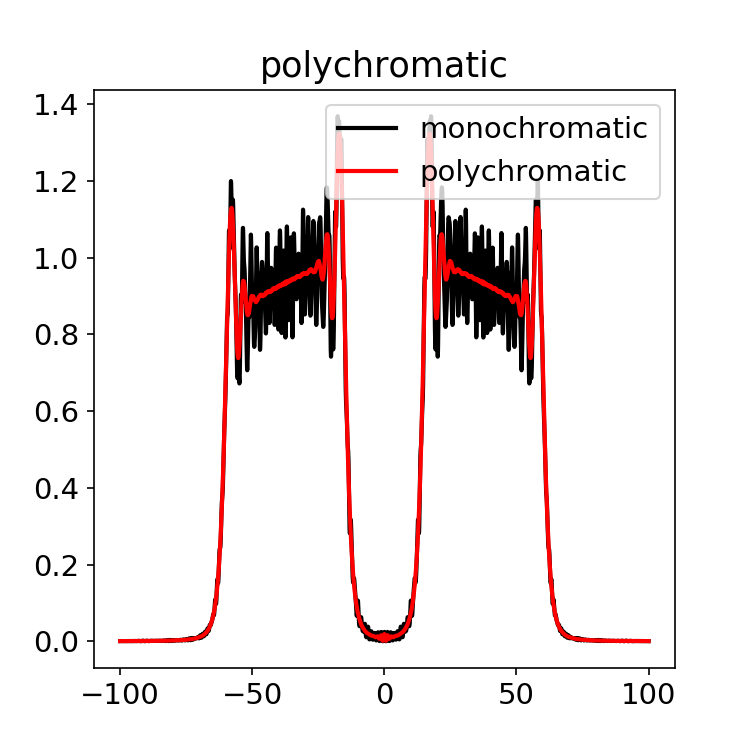

In [34]:
def creation_dictionary(wavelengths, x0, z, slit_size, separation):
    # create Parameters: for multiprocessing
    dict_Parameters = []
    for i, wavelength in enumerate(wavelengths):
        dict_Parameters.append(
            dict(
                x0=x0,
                wavelength=wavelength,
                z=z,
                slit_size=slit_size,
                separation=separation))
    return dict_Parameters

x0 = np.linspace(-100 * um, 100 * um, 1024*8)
wavelengths = np.linspace(0.3 * um, 0.8 * um, 101)
spectrum_gauss = gauss_spectrum(
    wavelengths=wavelengths, w_central=0.6, Dw=0.1, normalize=True)
num_processors = num_max_processors

dict_Parameters0 = dict(
    x0=x0,
    wavelength=0.6 * um,
    z=.05 * mm,
    slit_size=50 * um,
    separation=75 * um)

dict_Parameters = creation_dictionary(
    wavelengths=wavelengths,
    x0=x0,
    z=.05 * mm,
    slit_size=50 * um,
    separation=75 * um)

I0 = __experiment_double_slit_dictionary__(dict_Parameters0)

I_wavelengths, time_proc = execute_multiprocessing(
    __experiment_double_slit_dictionary__,
    dict_Parameters,
    num_processors,
    verbose=False)

print("num_proc= {}, time={}".format(num_processors, time_proc))

intensity = np.zeros_like(I_wavelengths[0].x)
for i in range(len(wavelengths)):
    intensity = intensity + spectrum_gauss[i] * abs(
        I_wavelengths[i].u)**2

plt.figure()
plt.plot(x0, abs(I0.u)**2, 'k', lw=2, label='monochromatic')
plt.plot(x0, intensity, 'r', lw=2, label='polychromatic')
plt.title('polychromatic')
plt.legend()

## def test_multiprocessing_array(self):

num_proc: 8, time=0.2332010269165039


<IPython.core.display.Javascript object>


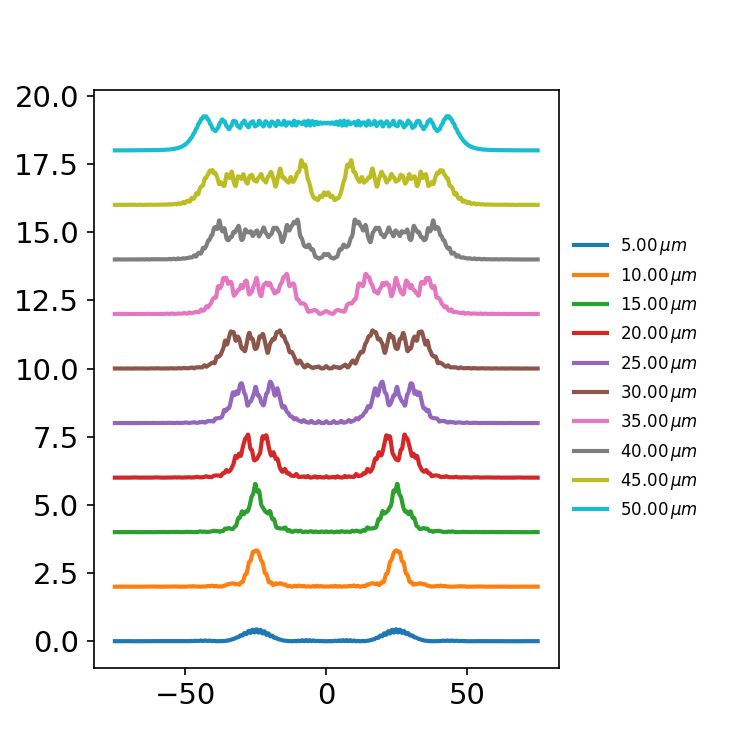

In [35]:
    slit_sizes = np.linspace(5 * um, 50 * um, 10)
    num_processors = num_max_processors

    u_s, time_proc = execute_multiprocessing(
        __experiment_double_slit_array__,
        slit_sizes,
        num_processors,
        verbose=True)

    plt.figure()
    ax = plt.subplot(111)
    for i, slit_size in enumerate(slit_sizes):
        ax.plot(
            u_s[i].x,
            abs(u_s[i].u)**2 + 2 * i,
            lw=2,
            label=r"${:2.2f}\,\mu m$".format(slit_size))
    box = ax.get_position()
    ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])

    # Put a legend to the right of the current axis
    ax.legend(
        fontsize=8,
        frameon=False,
        loc='center left',
        bbox_to_anchor=(1, 0.5))

## def test_extended_polychromatic_source(self):

num_proc: 8, time=1.4267585277557373


<IPython.core.display.Javascript object>


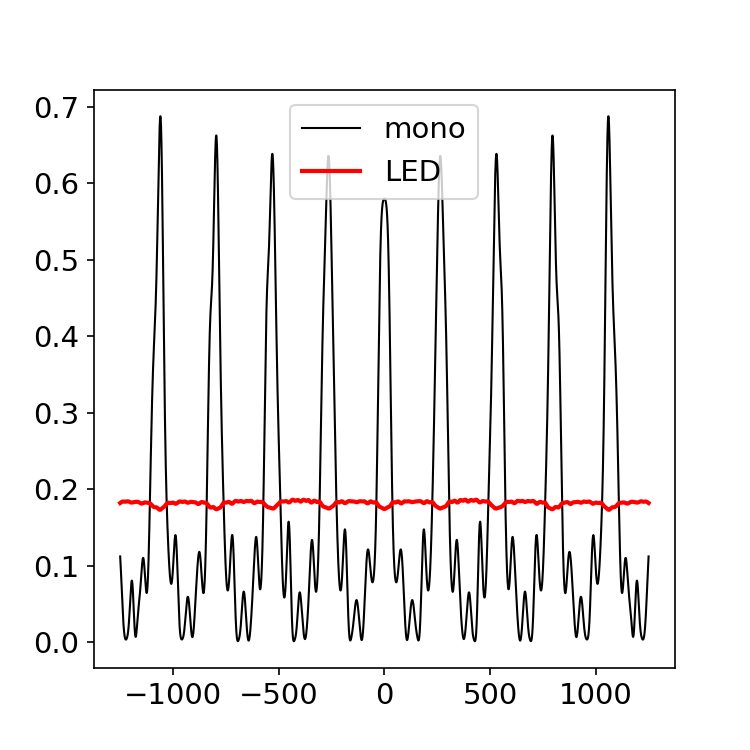

In [42]:
x0s = np.linspace(-150 * um, 150 * um, 21)
wavelengths = np.linspace(.6 * um, .61 * um, 11)
w_central = wavelengths.mean()
spectrum_gauss = gauss_spectrum(
    wavelengths=wavelengths,
    w_central=w_central,
    Dw=0.01,
    normalize=True)

u0 = __experiment_extended_polychromatic_source__(
    dict(x0=0, wavelength=w_central))

intensity, u_s, time_proc = extended_polychromatic_source(
    __experiment_extended_polychromatic_source__,
    x0s,
    wavelengths,
    spectrum_gauss,
    num_processors=num_max_processors,
    verbose=True)

plt.figure()
plt.plot(u_s[0].x, abs(u0.u)**2, 'k', lw=1, label='mono')
plt.plot(u_s[0].x, intensity, 'r', lw=2, label='LED')
plt.legend()
